<a href="https://colab.research.google.com/github/pragati-29/VarClust/blob/master/code_for_endiegene_plots_DP_nonsyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import glob2
import re
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.manifold import TSNE
from sklearn.cluster import Birch
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.spatial import ConvexHull
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import OPTICS
from sklearn.cluster import BisectingKMeans

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Indiegene_new_on_old_approach/Prostrate_new_n_old_method_matrix_dp_nonsyn.csv',index_col=0)
df_clus=df.astype(int).T
cancer='Soft_Tissue_old_new'
methods='DP_nonsyn'
matrix=''

In [ ]:
dim_red = TSNE(n_components=2, perplexity=5).fit_transform(df_clus)
tsne=pd.DataFrame(dim_red)
tsne.columns = ['x', 'y']

In [ ]:
def plot_clusters(data, x_axis, y_axis, cluster_labels, title,method,mat):
    output_folder = 'New_OLD_Images'
    os.makedirs(output_folder, exist_ok=True)
    plt.figure(figsize=(5, 5))
    sns.scatterplot(data=data, x=x_axis, y=y_axis, hue=cluster_labels)
    plt.legend(loc="upper right")
    plt.title(title)
    plt.grid(False)
    plt.savefig(os.path.join(output_folder, f'{title}_{method}_{mat}.png'), format='png', transparent=True)
    plt.show()

def perform_kmeans(n_clus,dim_red,can,method, mat):
    kmeans = KMeans(n_clusters=n_clus).fit(dim_red)
    labels = kmeans.labels_
    tsne['cluster'] = labels
    tsne.index = df_clus.index.tolist()
    x_axis = np.array(tsne['x'])
    y_axis = np.array(tsne['y'])
    plot_clusters(tsne, x_axis, y_axis, tsne['cluster'].map({0: "first", 1: "second", 2: "third",3:"fourth"}), can +"_clusters by KMeans",method,mat)
    print("KMeans:", silhouette_score(dim_red, labels))
    tsne.to_csv('/content/drive/MyDrive/Old_new_Clusters'+'/' + can +'_'+ method + '_' + mat + '_Kmeans' +'.csv' )

def perform_meanshift(dim_red,can, method, mat):
    ms = MeanShift().fit(dim_red)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    n_clusters = len(np.unique(labels))
    ms_df = pd.DataFrame(dim_red, columns=['x', 'y'])
    ms_df.index = df_clus.index.tolist()
    ms_df['cluster'] = labels
    ms_df["cluster_label"] = ms_df["cluster"].map({0: "first", 1: "second", 2: "third",3:"fourth"})
    x_axis = np.array(ms_df['x'])
    y_axis = np.array(ms_df['y'])
    plot_clusters(ms_df, x_axis, y_axis, ms_df['cluster_label'], can + "_clusters by Meanshift",method, mat)
    print(f'Silhouette Score: {silhouette_score(dim_red, labels)}')
    ms_df.cluster.value_counts(ascending=True)
    ms_df.to_csv('/content/drive/MyDrive/Old_new_Clusters'+'/' + can +'_'+ method + '_' + mat + '_Meanshift' +'.csv' )

def perform_spectral_clustering(n_clus,dim_red,can, method, mat):
    spec_clus = SpectralClustering(n_clusters=n_clus, affinity='nearest_neighbors').fit_predict(dim_red)
    spec_df = pd.DataFrame(dim_red, columns=['x', 'y'])
    spec_df['cluster'] = spec_clus
    spec_df.index = df_clus.index.tolist()
    spec_df["cluster_label"] = spec_df["cluster"].map({0: "first", 1: "second", 2: "third",3:"fourth"})
    x_axis = np.array(spec_df['x'])
    y_axis = np.array(spec_df['y'])
    plot_clusters(spec_df, x_axis, y_axis, spec_df['cluster_label'], can + "_clusters by Spectral", method, mat)
    tsne.to_csv('/content/drive/MyDrive/Old_new_Clusters'+'/' + can +'_'+ method + '_' + mat + '_Spectral' +'.csv' )
    print(f'Silhouette Score: {silhouette_score(dim_red, spec_clus)}')

def perform_birch(n_clus,dim_red,can, method, mat):
    brc = Birch(n_clusters=n_clus).fit_predict(dim_red)
    brc_df = pd.DataFrame(dim_red, columns=['x', 'y'])
    brc_df['cluster'] = brc
    brc_df.index = df_clus.index.tolist()
    brc_df["cluster_label"] = brc_df["cluster"].map({0: "first", 1: "second", 2: "third", 3:"fourth"})
    x_axis = np.array(brc_df['x'])
    y_axis = np.array(brc_df['y'])
    plot_clusters(brc_df, x_axis, y_axis, brc_df['cluster_label'], can + "_clusters by _BIRCH", method, mat)
    brc_df.to_csv('/content/drive/MyDrive/Old_new_Clusters'+ '/' + can +'_'+ method + '_' + mat +'BIRCH' +'.csv' )
    print(f'Silhouette Score: {silhouette_score(dim_red, brc)}')

def perform_optics(dim_red,can, method, mat):
    optics = OPTICS(min_samples=10).fit_predict(dim_red)
    optics_df = pd.DataFrame(dim_red, columns=['x', 'y'])
    optics_df['cluster'] = optics
    optics_df.index = df_clus.index.tolist()
    optics_df["cluster_label"] = optics_df["cluster"].map({0: "first", 1: "second", 2: "third",3:"fourth"})
    x_axis = np.array(optics_df['x'])
    y_axis = np.array(optics_df['y'])
    plot_clusters(optics_df, x_axis, y_axis, optics_df['cluster_label'], can + "_clusters by _OPTICS", method, mat)
    optics_df.to_csv('/content/drive/MyDrive/Old_new_Clusters'+ '/' + can +'_'+ method + '_' + mat +'OPTICS' +'.csv' )
    print(f'Silhouette Score: {silhouette_score(dim_red, optics)}')

def perform_bisect(n_clus,dim_red,can, method, mat):
    bisect = BisectingKMeans(n_clusters=n_clus, random_state=0).fit_predict(dim_red)
    bisect_df = pd.DataFrame(dim_red, columns=['x', 'y'])
    bisect_df['cluster'] = bisect
    bisect_df.index = df_clus.index.tolist()
    bisect_df["cluster_label"] = bisect_df["cluster"].map({0: "first", 1: "second", 2: "third",3:'fourth'})
    x_axis = np.array(bisect_df['x'])
    y_axis = np.array(bisect_df['y'])
    plot_clusters(bisect_df, x_axis, y_axis, bisect_df['cluster_label'], can + "_clusters by _BISECT", method, mat)
    bisect_df.to_csv('/content/drive/MyDrive/Old_new_Clusters'+ '/' + can +'_'+ method + '_' + mat +'BISECT' +'.csv' )
    print(f'Silhouette Score: {silhouette_score(dim_red, bisect)}')

In [ ]:
def calculate_clusters(data, max_clusters):
    scores = []

    for n_clusters in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(data)
        labels = kmeans.labels_
        score = silhouette_score(data, labels)
        scores.append(score)

    optimal_clusters = scores.index(max(scores)) + 2
    return optimal_clusters
calculate_clusters(dim_red,4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


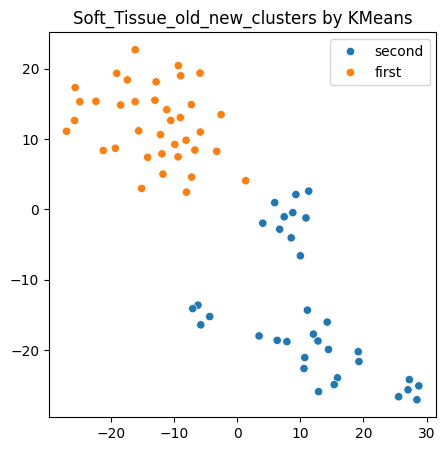

KMeans: 0.6081496


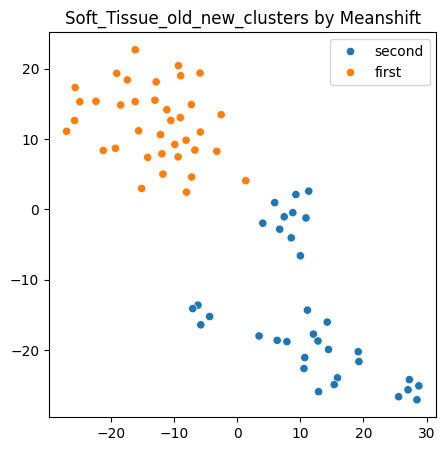

Silhouette Score: 0.6081495881080627


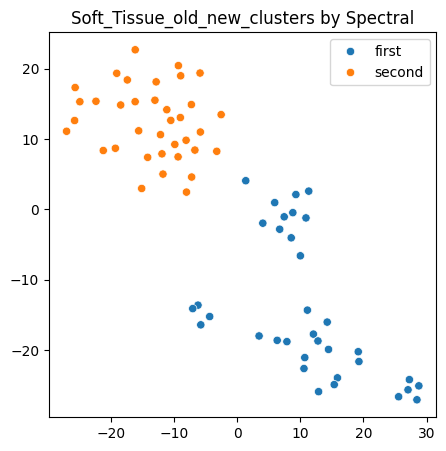

Silhouette Score: 0.6036096811294556


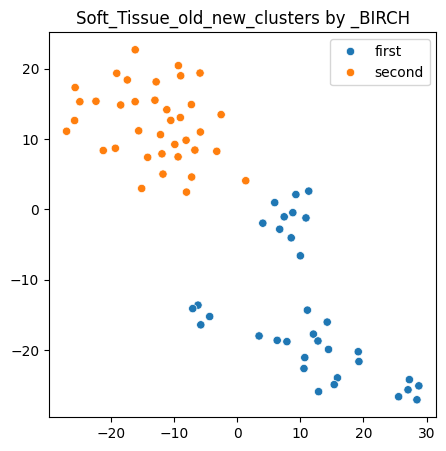

Silhouette Score: 0.6081495881080627


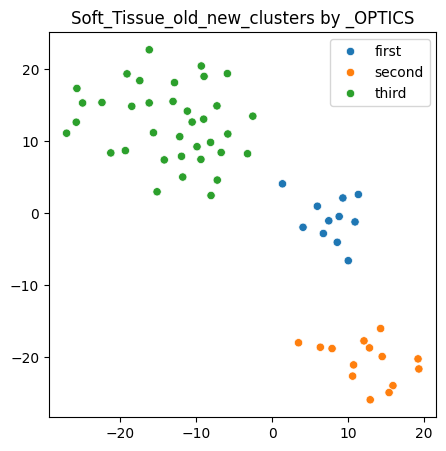

Silhouette Score: 0.48320427536964417


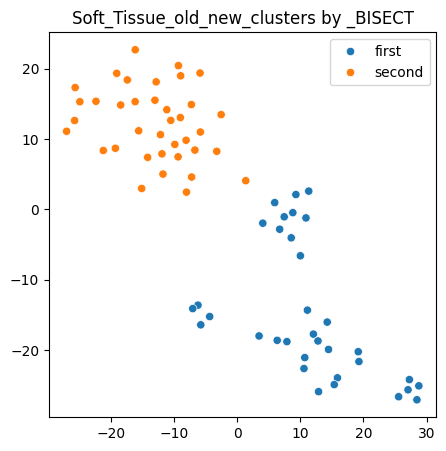

Silhouette Score: 0.6081495881080627


In [ ]:
# Perform clustering using KMeans
perform_kmeans(2,dim_red,cancer,methods,matrix)

# Perform clustering using MeanShift
perform_meanshift(dim_red,cancer,methods,matrix)

# Perform clustering using SpectralClustering
perform_spectral_clustering(2,dim_red,cancer,methods,matrix)

# Perform clustering using BIRCH
perform_birch(2,dim_red,cancer,methods,matrix)

# Perform clustering using OPTICS
perform_optics(dim_red,cancer,methods,matrix)

# Perform clustering using Bisect
perform_bisect(2,dim_red,cancer,methods,matrix)

9
-1     9
 0    26
 1    36
Name: cluster, dtype: int64
Silhouette Score: 0.46951863169670105


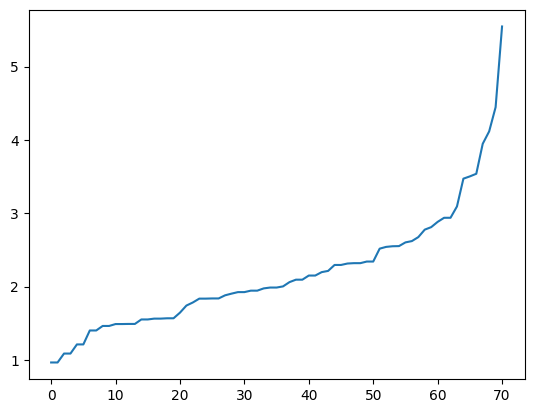

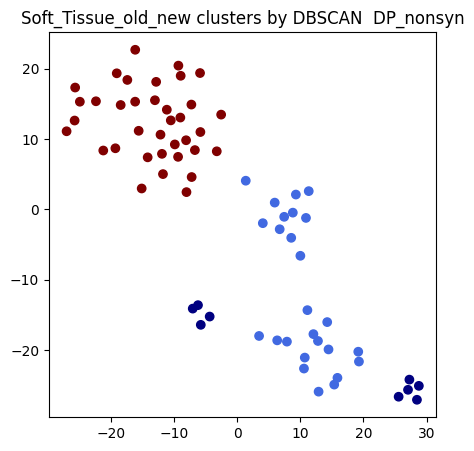

In [ ]:
#DBSCAN
nm=NearestNeighbors(n_neighbors=2)
nm_fit= nm.fit(dim_red)
distances, indices=nm_fit.kneighbors(dim_red)
distances= np.sort(distances, axis=0)
distances= distances[:,1]
plt.plot(distances)
den_clus = DBSCAN(eps=8, min_samples=6).fit(dim_red)
db_clus=den_clus.labels_
print(len(db_clus[db_clus==-1]))
db_df=pd.DataFrame(dim_red, columns=['x','y'])
db_df['cluster']=db_clus
print(db_df.cluster.value_counts(ascending=True))
colors=['royalblue','maroon','forestgreen','mediumorchid','tan','deeppink','olive','goldenrod','cyan','navy']
vecto=np.vectorize(lambda x: colors[x % len(colors)])
plt.figure(figsize=(5,5))
plt.scatter(dim_red[:,0], dim_red[:,1],c=vecto(db_clus))
plt.title(cancer+ " clusters by DBSCAN  "+ methods)
plt.savefig("/content/New_OLD_Images" +'/'+ cancer+'_DBSCAN.png', format='png', transparent=True)
db_df.to_csv('/content/drive/MyDrive/Old_new_Clusters'+ '/' + cancer +'_'+ methods + '_'+'BISECT' +'.csv' )
print(f'Silhouette Score: {silhouette_score(dim_red, den_clus.labels_)}')
#print(davies_bouldin_score(model, kmeans.labels_))

0     5
1     5
3    11
6    11
4    12
5    13
2    14
Name: cluster, dtype: int64
Silhouette Score: 0.4891400933265686


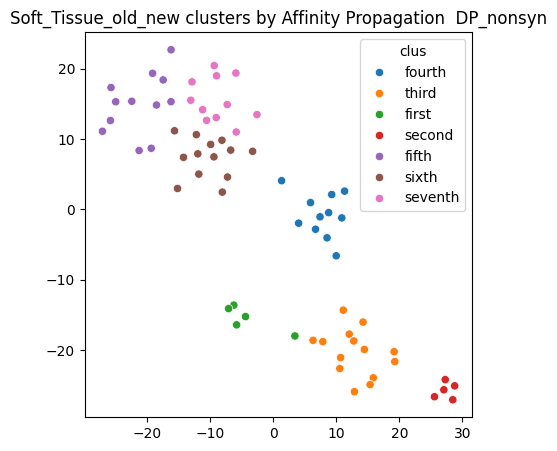

In [ ]:
aff_prop = AffinityPropagation(random_state=2).fit(dim_red)
aff_prop_df=pd.DataFrame(dim_red,columns=['x','y'])
aff_prop_df['cluster']= aff_prop.labels_
aff_prop_df['cluster'].unique()
print(aff_prop_df.cluster.value_counts(ascending=True))
aff_prop_df.index=df_clus.index.tolist()
aff_prop_df["clus"]=aff_prop_df["cluster"].map({0:"first", 1:"second" , 2:'third',3:"fourth",
                                                4:"fifth",5:"sixth",6:"seventh",7:"eighth",8:"ninth",9:"tenth",
                                                10:"eleventh",11:"Twelfth",12:"thirteen",13:"fourteen",14:"fifteen",15:"sixteen"})
x_axis4=np.array(aff_prop_df['x'])
y_axis4=np.array(aff_prop_df['y'])
plt.figure(figsize=(5,5))
#plt.axes(projection='3d')
plt.title(cancer+ " clusters by Affinity Propagation  "+ methods)
sns.scatterplot(data=aff_prop_df,x=x_axis4,y=y_axis4,hue=aff_prop_df['clus'])
plt.savefig('/content/New_OLD_Images'  + '/' +cancer+ '_Affinity_prop.png', format='png', transparent=True)
aff_prop_df.to_csv('/content/drive/MyDrive/Old_new_Clusters'+ '/' + cancer +'_'+ methods + '_'  +'BISECT' +'.csv' )
print(f'Silhouette Score: {silhouette_score(dim_red, aff_prop.labels_)}')
#print(davies_bouldin_score(dim_red, aff_prop.labels_))